# Importar librerias

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Hacer lista de todas las imagenes que se deben leer

In [48]:
#List all image files
import glob
image_list = []
base1='../input/faces94/*'
for root1 in glob.glob(base1):
    base2=root1+'/*'
    for (root2) in glob.glob(base2):
        base3=root2+'/*.jpg'
        for (root3) in glob.glob(base3):
            image_list.append(root3)


# Inspección individual

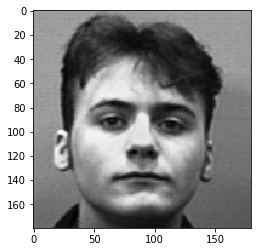

In [52]:
#Plot a given image
image = cv2.resize(cv2.imread(image_list[2500]),(180, 180)) 
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap = plt.cm.gray)

# Matriz con todo el dataset

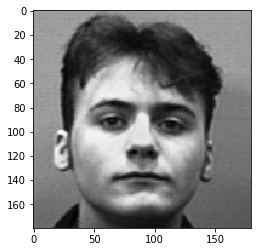

In [55]:
# Make a whole matrix with all dataset 180x180*num_images
data_set=np.zeros((len(image_list),180,180))
for image in range(len(image_list)):
    data_set[image,:,:]=cv2.cvtColor(cv2.resize(cv2.imread(image_list[image]),(180, 180)),cv2.COLOR_BGR2GRAY)
plt.imshow(data_set[2500,:,:], cmap = plt.cm.gray) #check 

# Calculemos el rostro medio

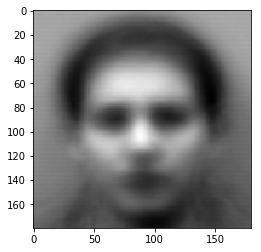

In [56]:
mean_face=np.mean(data_set, axis=0)
plt.imshow(mean_face, cmap = plt.cm.gray) #check 

# Calculemos el rostro mediano

In [ ]:
median_face=np.median(data_set, axis=0)
plt.imshow(median_face, cmap = plt.cm.gray) #check 